## The N-Body Problem
This is a classic problem that's been of interest since the time of Newton. As it relates to the positions in of heavenly bodies, it was at the center of great debates that took place during the 1500s and involved such greats as Tycho Brahe (my favorite), Nicolaus Copernicus, Galileo, and Kepler.

We'll attack the problem with a brute force approach, adding up all the forces occurring between bodies. However, many good alternatives exist, and will be the topic of at least one graduate project.

### Two bodies
Consider a force such as gravity, which pulls the moon toward the Earth *and the Earth toward the moon*. Generalize these two bodies to a pair of particles.

Suppose the particles are numbered 1 and 2. The force on 1 due to 2 will be labeled $\mathbf{F}_{12}$. Note it is a vector quantity. What about the force on 2 due to 1? Well, it's going to be anti-symmetric in the cases we will consider, $\mathbf{F}_{12} = -\mathbf{F}_{21}$. What might this force look like? It will be a *central force*, expressed as

$$\mathbf{F}_{12}(\mathbf{r}) = |F_{12}(r)|\mathbf{\hat r}_{12}.$$

This is like what we've seen before where the magnitude is abstracted as $ |\mathbf{F}_{12}(\mathbf{r})|$, and we focus on the direction in $\mathbf{\hat{r}}_{12}$. 

This direction is given by
$$\mathbf{\hat{r}}_{12} = \frac{\mathbf{r}_1 - \mathbf{r}_2}{|\mathbf{r}_1 - \mathbf{r}_2|},$$
which points from 2 to 1.

![The difference in vectors.]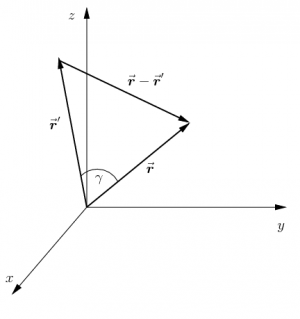

So, now we know the direction of this abstract force. How do we account for its working in both directions? That is particle 1 on 2 and 2 on 1.

It is convenient to write the forces in a matrix, where the matrix entry $\mathcal{F}_{ij}$ is the force of $j$ on $i$. There is no self-interaction; $\mathcal{F}_{ii}$=0.

$$\mathcal{F} =
\begin{bmatrix}
0 & \mathbf{F}_{12}  \\
\mathbf{F}_{21}&0\\
\end{bmatrix}
=
\begin{bmatrix}
0 & \mathbf{F}_{12}  \\
-\mathbf{F}_{12}&0\\
\end{bmatrix}$$

Such a matrix has two important properties; 
* the sum of each row is the total force on particle $i$ - $\mathbf{F}_i = \sum_j \mathcal{F}_{ij}$
* the matrix is anti-symmetric, so only the upper triangle needs to be computed.

But, what about those entries in that matrix - it looks like **they should be vectors**. In practice, it will be useful to maintain a scalar matrix for each dimension, a matrix of the $x$ components of force, $\mathcal{F}^x_{ij}$, and $y$ components, $\mathcal{F}^y_{ij}$, etc. 

### Three and more bodies
It probably occurred to you that the matrices are a lot of work when the forces are just $\mathbf{F}_{12}$ and $-\mathbf{F}_{12}$; the result of a single calculation. But, watch what happens with three bodies.

![The positions of and vectors between three bodies.]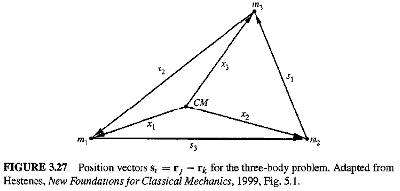

$$\mathcal{F} =
\begin{bmatrix}
0 & \mathbf{F}_{12} & \mathbf{F}_{13} \\
\mathbf{F}_{21} & 0 & \mathbf{F}_{23}\\
\mathbf{F}_{31}  & \mathbf{F}_{32} & 0
\end{bmatrix}$$

In this case, the sums of the rows are critical because because each body is attracted to 2 other bodies. But the formalism is powerful and appropriate. How many unique calculations need to be done? 

$$\mathcal{F} =
\begin{bmatrix}
0 & \mathbf{F}_{12} & \mathbf{F}_{13} \\
-\mathbf{F}_{12} & 0 & \mathbf{F}_{23}\\
-\mathbf{F}_{13}  & -\mathbf{F}_{23} & 0
\end{bmatrix}$$

Just 3, the upper triangle of the matrix. The most important aspect is, again, the fact that the total force on each particle is computed by summing its row:

$$\mathbf{F}_i = \sum_j \mathcal{F}_{ij}$$

With this statement, I think we see the sketch of the n-body algorithm. First we fill in a matrix:

`for i in range(len(particles):
    for j range(i+1,len(particles)):
        rij = particles.r(i) - particles.r(j)
        Fmatrix[i,j] = f(rij) * rij / norm(rij)
`

Then we find the force on each particle with sums over the rows of `FMatrix`

The generalization from three bodies to n-bodies is superficial.

There are opportunities to vectorize the operations by using `repmat` to create highly redundant arrays of coordinate data. Doing this may interest you, but it isn't necessary. It does tend to obfuscate code. I do wonder, but haven't tried to see if `numba` doesn't get the speedups sought.

### The force
It has been worthwhile to abstract the force. As you can see in the psuedo-code/Python above, a function handle is a nice mechanism for this. However, we'll be concerned with gravitational forces in this class. That force is

$$\mathbf{F}_{12} = -G \frac{m_1m_2}{r_{12}^2}\mathbf{\hat{r}}_{12}$$

Which can more conveniently be written

$$\mathbf{F}_{12} = -G \frac{m_1m_2}{r_{12}^3}\mathbf{r}_{12}$$

If you are curious about why we generalize, let me provide at least one example. There is a rich literature in molecular dynamics which involves the use of Lennard-Jones type potentials

$$4\epsilon \left[\left(\frac{\sigma}{r}\right)^{12}-\left(\frac{\sigma}{r}\right)^{6}\right]$$

Which describe weak attraction/strong repulsion. Forces are found by differentiation of the potential.

Of late, this concept has been extended to something called *discrete-element modeling*, which is good for large assemblages of granular material.

### Objective

Write an ODE function that provides the derivatives for the n-body problem. Assume as you have in the past that the state is entering as some vector `y` and the function will return `dydt`, or $\frac{dy}{dt}$. To match signatures, the function will have to accept a `t` or time that is not used, and a `p` which is a parameter. Here, it suggest `p` be made a dictionary of parameters.

The difficulties to be resolved in implementation include

* accounting for the masses of the particles.
* accounting for the dimension of the problem.
* accounting for the half way point, or where the position information stops, and the velocity information begins.
* not computing the same thing twice; only find $\mathbf{F}_{ij}$, not $\mathbf{F}_{ji}$. But, account for both.
* summing the columns so that each row's sum is the force on a particle.
* determining the acceleration and not the mass.
* handling a parameter called `fix_first` that prevents the first particle from moving. This is useful for simulating massive objects like the sun, and will help with a simulation of the helium atom.

Below, you will find the signature for the function, and some test data results to determine if the function is working correctly. Finish the function and verify the test data is giving the correct outputs.

In [1]:
import numpy as np

def n_body(t, y, p):
    '''
    N-body simulation using force matrix formulation.
    Each entry Fij in the force matrix represents the force from body j on body i.
    The total force on each body is computed by summing its row in the matrix.
    
    The state vector y contains:
    - First n*d elements: positions (d coordinates for each of n bodies)
    - Last n*d elements: velocities (d components for each of n bodies)
    
    Returns dydt containing:
    - First n*d elements: velocity (dr/dt = v)
    - Last n*d elements: acceleration (dv/dt = F/m)
    '''
    G = p['G']
    masses = p['m']
    n = len(masses)
    d = p['dimension']
    
    # unpack state
    positions = y[:n*d].reshape((n, d))
    velocities = y[n*d:].reshape((n, d))
    
    # initialize force matrix
    F = np.zeros((n, n, d)) # I store this as a 3d array, 1 matrix for each body
    # F structure:
    # [[[  0.    0.  ]  # No self-force (F[0,0] = 0) # Body 0
    # [  1.   -0.  ]  # Force from 1 → 0 (F[0,1])
    # [-1.   -0.  ]]  # Force from 2 → 0 (F[0,2])

    # [[-1.    0.  ]  # Force from 0 → 1 (F[1,0]) # Body 1
    # [  0.    0.  ]  # No self-force (F[1,1] = 0)
    # [-0.25 -0.  ]]  # Force from 2 → 1 (F[1,2])derivative of positions is velocities; the derivative of velocities is accelerations

    # [[  1.    0.  ]  # Force from 0 → 2 (F[2,0]) # Body 2
    # [  0.25  0.  ]  # Force from 1 → 2 (F[2,1])
    # [  0.    0.  ]]] # No self-force (F[2,2] = 0)

    # calculate forces
    for i in range(n):
        for j in range(i+1, n):
            # vector from j to i
            r_vec = positions[i] - positions[j]
            
            # gravitational force between j and i
            force = g_force(masses[i], masses[j], G, r_vec)
            
            # populate force matrix
            F[i,j] = -force  # force on body i due to body j
            F[j,i] = force   # force on body j due to body i

    # compute accelerations (sum forces on each body and divide by mass)
    acc = np.zeros_like(positions)
    for i in range(n): # iterate over the F matrix layers (1 per body)
        # sum all forces acting on body i (sum across the row)
        total_force = np.sum(F[i], axis=0)
        acc[i] = total_force / masses[i]
    
    # # if fix_first is set, the first body does not move
    # if p.get("fix_first", False):
    #     acc[0] = 0.0
    #     velocities[0] = 0.0
    
    # the derivative of positions is velocities; the derivative of velocities is accelerations
    dydt = np.concatenate((velocities.flatten(), acc.flatten()))
    # zero out the velocity derivatives for the fixed body
    if p.get("fix_first", False):
        dydt[:d] = 0.0  # set the first 'd' elements (velocity of first body) to 0

        
    return dydt


# helper func for g force
def g_force(m1, m2, g, r_vec):
    '''
    Calculate the gravitational force between two bodies
    '''
    r_hat = np.linalg.norm(r_vec)
    return g * m1 * m2 * r_vec / (r_hat**3)

In [ ]:
from prettytable import PrettyTable
euler = np.array([0,0,1,0,-1,0,0,0,0,.8,0,-.8])
p = {'m':[1,1,1],'G':1,'dimension':2,'fix_first':False}
headings = ['RUN','x1','y1','x2','y2','x3','y3','vx1','vy1','vx2','vy2','vx3','vy3']
t = PrettyTable(headings)
t.add_row(['euler']+list(n_body(0,euler,p)))
t

In [2]:
n_body(0,euler,p)

NameError: name 'euler' is not defined

In [ ]:
"""
Test data - make sure that your function reproduces the following.
Why not add a row of differences and make sure they are zero?
"""

# Order is all positions then all velocities grouped by body.
# eg, three bodies in two dimensions:
# x1,y1,x2,y2,x3,y3,vx1,vy1,vx2,vy2,vx3,vy3

from prettytable import PrettyTable
# from numpy import 

euler      = np.array([0,0,1,0,-1,0,0,0,0,.8,0,-.8])
four_body  = np.array([1.382857,0,\
                   0,0.157030,\
                  -1.382857,0,\
                   0,-0.157030,\
                   0,0.584873,\
                   1.871935,0,\
                   0,-0.584873,\
                  -1.871935,0],dtype=float)
helium_1 = np.array([0,0,2,0,-1,0,0,0,0,.95,0,-1])

# The data structure holding parameters. You need not
# do it this way, but it's nice.

p = {'m':[1,1,1],'G':1,'dimension':2,'fix_first':False}
p4 = {'m':[1,1,1,1],'G':1,'dimension':2,'fix_first':False}
phe = {'m':[2,-1,-1],'G':1,'dimension':2,'fix_first':True}

headings = ['RUN','x1','y1','x2','y2','x3','y3','vx1','vy1','vx2','vy2','vx3','vy3']
t = PrettyTable(headings)
t.add_row(['euler']+list(n_body(0,euler,p)))

t.add_row(['He']+list(n_body(0,helium_1,phe)))
print(t)

headings = ['RUN','x1','y1','x2','y2','x3','y3','x4','y4','vx1','vy1','vx2','vy2','vx3','vy3','vx4','vy4']
t = PrettyTable(headings)
t.add_row(['4 body']+list(n_body(0,four_body,p4)))
print(t)

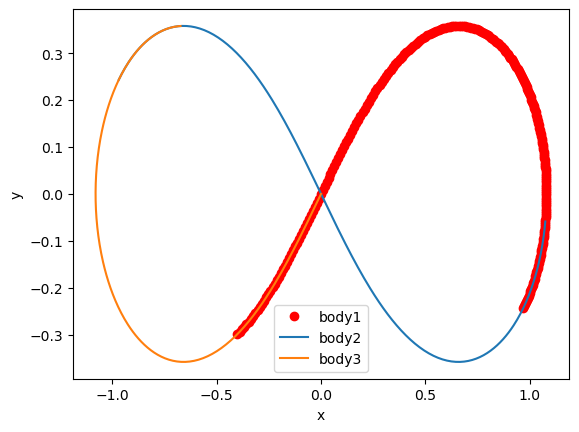

In [17]:
import integrators as intg
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from IPython.display import HTML

# initial state 3 body example
y0 = np.array([0,0,1,0,-1,0,0,0,0,.8,0,-.8]) # 3 body euler example
p = {'m':[1,1,1],'G':1,'dimension':2,'fix_first':False} # 3 body
t_span = [0, 3.1] # 3 body

# initial state 4 body example
# y0  = np.array([1.382857,0,\
#                    0,0.157030,\
#                   -1.382857,0,\
#                    0,-0.157030,\
#                    0,0.584873,\
#                    1.871935,0,\
#                    0,-0.584873,\
#                   -1.871935,0],dtype=float) # 4 body example
# p = {'m':[1,1,1,1],'G':1,'dimension':2,'fix_first':False} # 4 body
# t_span = [0, 3.125] # 4 body

# initial state helium example
# y0 = np.array([0,0,2,0,-1,0,0,0,0,.95,0,-1]) # helium example
# p = {'m':[2,-1,-1],'G':1,'dimension':2,'fix_first':True} # helium example
# t_span = [0, 10] # helium example

# randomized n body example
# n_bodies = 10
# y0 = np.random.rand(n_bodies*4)
# p = {'m':np.random.rand(n_bodies),'G':1,'dimension':2,'fix_first':False}
# t_span = [0, 3]

from numpy import array,float64

# Order is all coordinates then all velocities in groups by mass:
# x1,y1,x2,y2,x3,y3,vx1,vy1,vx2,vy2,etc
euler      = array([0,0,1,0,-1,0,0,0,0,.8,0,-.8])

montgomery = array([0.97000436,-0.24308753,-0.97000436,0.24308753, 0., 0.,\
                    0.466203685, 0.43236573, 0.466203685, 0.43236573,\
                   -0.93240737,-0.86473146])
lagrange = array([1.,0.,-0.5,0.866025403784439, -0.5,-0.866025403784439,\
                  0.,0.8,-0.692820323027551,-0.4, 0.692820323027551, -0.4])

skinny_pinapple = array([0.419698802831,1.190466261252,\
                        0.076399621771,  0.296331688995,\
                        0.100310663856, -0.729358656127,\
                        0.102294566003,  0.687248445943,\
                        0.148950262064,  0.240179781043,\
                       -0.251244828060, -0.927428226977])

hand_in_hand_oval = array([0.906009977921, 0.347143444587,\
                          -0.263245299491, 0.140120037700,\
                          -0.252150695248, -0.661320078799,\
                           0.242474965162, 1.045019736387,\
                          -0.360704684300, -0.807167979922,\
                           0.118229719138, -0.237851756465])

four_body = array([1.382857,0,\
                   0,0.157030,\
                  -1.382857,0,\
                   0,-0.157030,\
                   0,0.584873,\
                   1.871935,0,\
                   0,-0.584873,\
                  -1.871935,0],dtype=float)

helium_1 = array([0,0,2,0,-1,0,0,0,0,.95,0,-1])
helium_2 = array([0,0,3,0,1,0,0,0,0,.4,0,-1])

p4 = {'m':array([1,1,1,1]),'G':1,'dimension':2,'force':g_force,'fix_first':False}
p3 = {'m':array([1,1,1]),'G':1,'dimension':2,'force':g_force,'fix_first':False}
p_he = {'m':array([2,-1,-1]),'G':1,'dimension':2,'force':g_force,'fix_first':True}

y0 = montgomery
p = p3
t_span = [0, 2.5]

dt = 0.01

t, y = intg.solve_ode(n_body, t_span, y0, intg.RK4, args=(p,), first_step=dt)

# animate the motion using jshtml

# fig, ax = plt.subplots()
# ax.set_aspect('equal')
# ax.set_xlim(-5, 5)
# ax.set_ylim(-5, 5)
# ax.set_xlabel('x')
# ax.set_ylabel('y')

# # create circles for each body
# circles = [Circle((0,0), 0.1, fill=False) for _ in range(len(p['m']))]
# for circle in circles:
#     ax.add_artist(circle)

# # function to update the plot
# def update(i):
#     positions = y[i, :p['dimension']*len(p['m'])].reshape((len(p['m']), p['dimension']))
#     for circle, pos in zip(circles, positions):
#         circle.center = pos
#     return circles

# # create animation
# ani = FuncAnimation(fig, update, frames=len(t), blit=True)

# # display the animation
# HTML(ani.to_jshtml())


# show trajectories of all bodies on the same plot
plt.plot(y[:,0],y[:,1],'ro',label='body1')
plt.plot(y[:,2],y[:,3],label='body2')
plt.plot(y[:,4],y[:,5],label='body3')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

---

#### Solar System

In [ ]:
import numpy as np
import integrators as intg
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from IPython.display import HTML

# astronomical constants
AU = 1.0 # astronomical Unit
M_SUN = 1.0 # solar mass (will be used for relative masses)
YEAR = 1.0 
G = 39.5 # gravitational constant scaled to the proper units (AU^3 / (M_SUN * YEAR^2)) where (1 AU = 1.496x10^11 meters, 1SM = 1.989x10^30 kg, 1 year = 31557600 seconds)

# calculate orbital velocities using Kepler's Third Law
def get_orbital_velocity(semi_major_axis):
    # v = sqrt(GM/r) for circular orbits
    return np.sqrt(G * M_SUN / semi_major_axis) 

# planet data: [name, mass (solar masses), semi-major axis (AU), orbital period (years), size for visualization]
PLANETS = [
    ['Sun',     1.0,      0.0,    0.0,   0.45],
    ['Mercury', 1.66e-7,  0.387,  0.24,  0.15],  # period: 0.24 years
    ['Venus',   2.45e-6,  0.723,  0.615, 0.21],  # period: 0.615 years
    ['Earth',   3.00e-6,  1.0,    1.0,   0.21],  # period: 1.0 years
    ['Mars',    3.23e-7,  1.524,  1.88,  0.18],  # period: 1.88 years
    ['Jupiter', 9.55e-4,  5.203,  11.86, 0.36],  # period: 11.86 years
    ['Saturn',  2.86e-4,  9.537,  29.46, 0.30],  # period: 29.46 years
    ['Uranus',  4.37e-5,  19.191, 84.01, 0.24],  # period: 84.01 years
    ['Neptune', 5.15e-5,  30.069, 164.79, 0.24]  # period: 164.79 years
]

# initial conditions objects
n_bodies = len(PLANETS)
y0 = np.zeros(n_bodies * 4)

# init positions and velocities
for i, (_, _, a, period, _) in enumerate(PLANETS): # iterate over planets (first _ is the name, second _ is the mass, a is the semi-major axis, period is the orbital period, and the last _ is the size)
    # position (starting along x-axis)
    y0[i*2] = a
    y0[i*2 + 1] = 0
    
    # velocity (starting in y-direction for circular orbit)
    if period != 0:  # skip Sun
        v = get_orbital_velocity(a)
        y0[i*2 + n_bodies*2] = 0 # x-component
        y0[i*2 + n_bodies*2 + 1] = v # y-component

# params for the simulation
p = {
    'm': [planet[1] for planet in PLANETS],
    'G': G,
    'dimension': 2,
    'fix_first': True
}

# time span for simulation (in years)
n_years = 10
t_span = [0, n_years]
dt = 0.01

# solve the n-body problem
t, y = intg.solve_ode(n_body, t_span, y0, intg.EulerRichardson, args=(p,), first_step=dt)

# set up the animation
fig, ax = plt.subplots(figsize=(12, 12))
ax.set_aspect('equal')
ax.set_xlim(-32, 32)
ax.set_ylim(-32, 32)
ax.set_xlabel('Distance (AU)')
ax.set_ylabel('Distance (AU)')
ax.set_title(f'Solar System Simulation ({n_years} years)')

# create circles for each body
sizes = [planet[4] for planet in PLANETS]
colors = ['yellow', 'gray', 'orange', 'blue', 'red', 'brown', 'gold', 'lightblue', 'blue']
circles = [Circle((0,0), size, fill=True, color=color) 
          for size, color in zip(sizes, colors)]

# add asteroid belt
asteroid_belt_inner = plt.Circle((0, 0), 2.7, fill=False, linestyle='--', color='gray', alpha=0.5)
ax.add_artist(asteroid_belt_inner)

for circle in circles:
    ax.add_artist(circle)

# add legend with orbital periods
legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
                            markerfacecolor=color, 
                            label=f"{planet[0]} ({planet[3]:.2f} yr)" if planet[3] != 0 else planet[0])
                  for color, planet in zip(colors, PLANETS)]
legend_elements.append(plt.Line2D([0], [0], linestyle='--', color='gray', 
                                label='Asteroid Belt'))
ax.legend(handles=legend_elements, loc='upper right')

# function to update the plot
def update(i):
    positions = y[i, :p['dimension']*len(p['m'])].reshape((len(p['m']), p['dimension']))
    for circle, pos in zip(circles, positions):
        circle.center = pos
    return circles

# create animation 
ani = FuncAnimation(
    fig, 
    update, 
    frames=len(t),#//2, # half frames to speed up the animation (removed since it broke the display of the orbit timings)
    blit=True, 
    interval=30 # 30 ms delay between frames
)

# save the animation to mp4
ani.save('solar_system_sim.mp4', writer='ffmpeg')

# display the animation
HTML(ani.to_jshtml())